In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()
type(cancer)

sklearn.utils.Bunch

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [7]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_data = scaler.transform(df)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
x_pca = pca.transform(scaled_data)
x_pca.shape

(569, 2)

Text(0,0.5,'Second paramn')

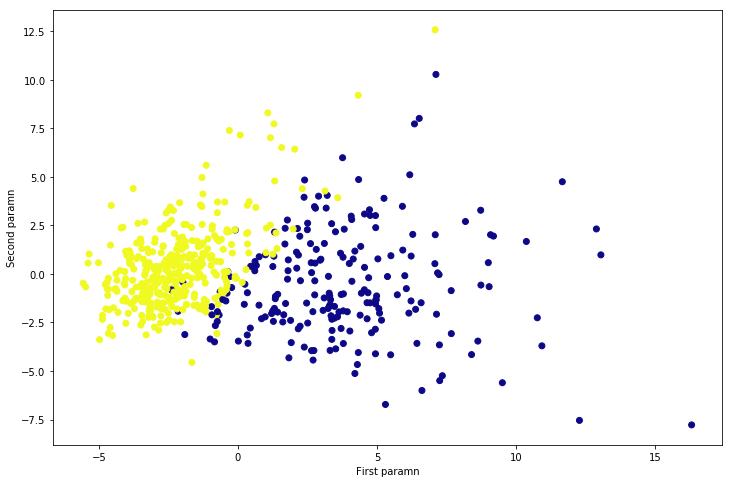

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0], x_pca[:, 1], c=cancer['target'], cmap='plasma')
plt.xlabel("First paramn")
plt.ylabel("Second paramn")

In [15]:
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])
df_comp.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


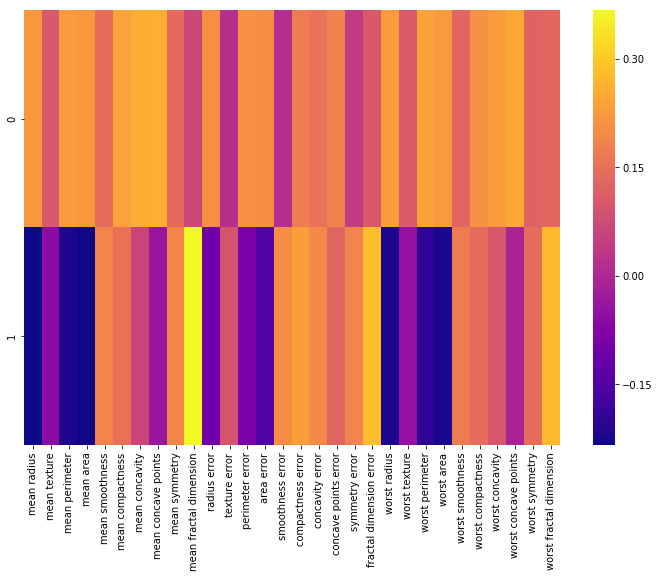

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df_comp, cmap='plasma')